# Pixel-Level Control: Brightness, Blending, and Bitwise Operations

In this second blog in the series, we will be covering some more advanced techniques for image manipulation that will build upon our existing repertoire of techniques learned in the previous blog. Some of the techniques we are going to cover will involve image brightness, contrast, and other useful manipulations that will prove to be very useful as their own techniques, but also as pre-processing steps for future techniques covered in the series.

In [26]:
# @title Header Code
import base64
import requests
import urllib.request
from IPython.display import display, HTML

image_url = "https://raw.githubusercontent.com/SoftwareSushi/marketing-resources/main/images/company/logo.png"
with urllib.request.urlopen(image_url) as response:
    image_data = response.read()
    encoded_image = base64.b64encode(image_data).decode()

def load_html_from_github(raw_url):
    response = requests.get(raw_url)
    html_content = response.text
    updated_html = html_content.replace('../images/logo.png', f"data:image/png;base64, {encoded_image}")
    display(HTML(updated_html))

In [27]:
# @title Contact Software Sushi
load_html_from_github('https://raw.githubusercontent.com/SoftwareSushi/marketing-resources/refs/heads/main/html/cta-banner-with-logo.html')

### Imports & Sample Images

In [23]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [24]:
# Collecting the sample images
image_url = "https://raw.githubusercontent.com/SoftwareSushi/marketing-resources/main/images/opencv_blog/part_2/Parrot-on-pirate-ship.png"
resp = urllib.request.urlopen(image_url)
image_bytes = np.asarray(bytearray(resp.read()), dtype=np.uint8)

image_url_2 = "https://raw.githubusercontent.com/SoftwareSushi/marketing-resources/main/images/opencv_blog/part_1/Parrot-on-branch.png"
resp_2 = urllib.request.urlopen(image_url_2)
image_bytes_2 = np.asarray(bytearray(resp_2.read()), dtype=np.uint8)

image_url_3 = "https://raw.githubusercontent.com/SoftwareSushi/marketing-resources/main/images/opencv_blog/part_2/bitwise_parrot.png"
resp_3 = urllib.request.urlopen(image_url_3)
image_bytes_3 = np.asarray(bytearray(resp_3.read()), dtype=np.uint8)

image_url_4 = "https://raw.githubusercontent.com/SoftwareSushi/marketing-resources/main/images/opencv_blog/part_2/bitwise_comparisons.png"
resp_4 = urllib.request.urlopen(image_url_4)
image_bytes_4 = np.asarray(bytearray(resp_4.read()), dtype=np.uint8)

### Utils

In [25]:
# Function for the creation of flexible MatPlotLib figures
def create_mpl_figure(w,h,images,titles="Image",axis="off"):
    plt.figure(figsize=[w,h])
    for i, image in enumerate(images):
        plt.subplot(1,len(images),i+1); plt.imshow(image); plt.title(titles[i]); plt.axis(axis);

## List of Techniques

* Image Addition & Subtraction
* Image Multiplication
* Bitwise AND
* Bitwise OR
* Bitwise NOT
* Bitwise XOR
* Masking
* Splitting & Merging Color Channels

## Use Cases

Whether it is splitting different color channels to allow for the creation of color blind filters on videos / images, or using bitwise XOR operations to detect changes in image for video surveillance applications, the following techniques have a variety of different applications in the world that make them very useful to learn.

## Techniques

### Image Addition, Subtraction, Blending:

**What it does:** Image addition takes two images, and adds them together. This can result on overlays of images onto others, or increasing / decreasing brightness of one image by adding or subctracting a duplicate image of greater or lesser brightness.

**Why it matters:** Whether it be adding watermarks to copyrighted images, subtracting noise from an image, or detecting changes in between two similar frames of an image or video, image addition and subtraction have many practical uses.

**The Code & Output**

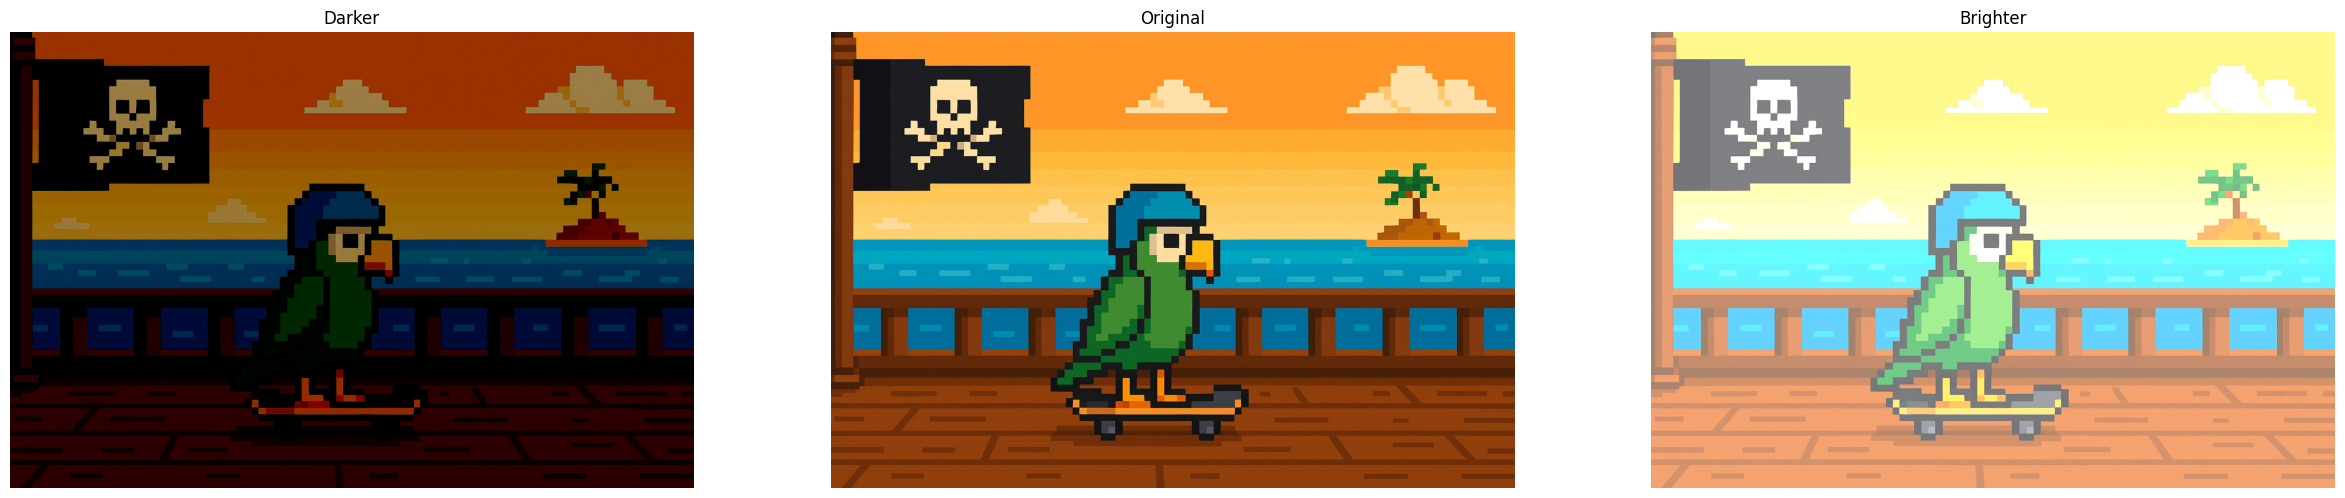

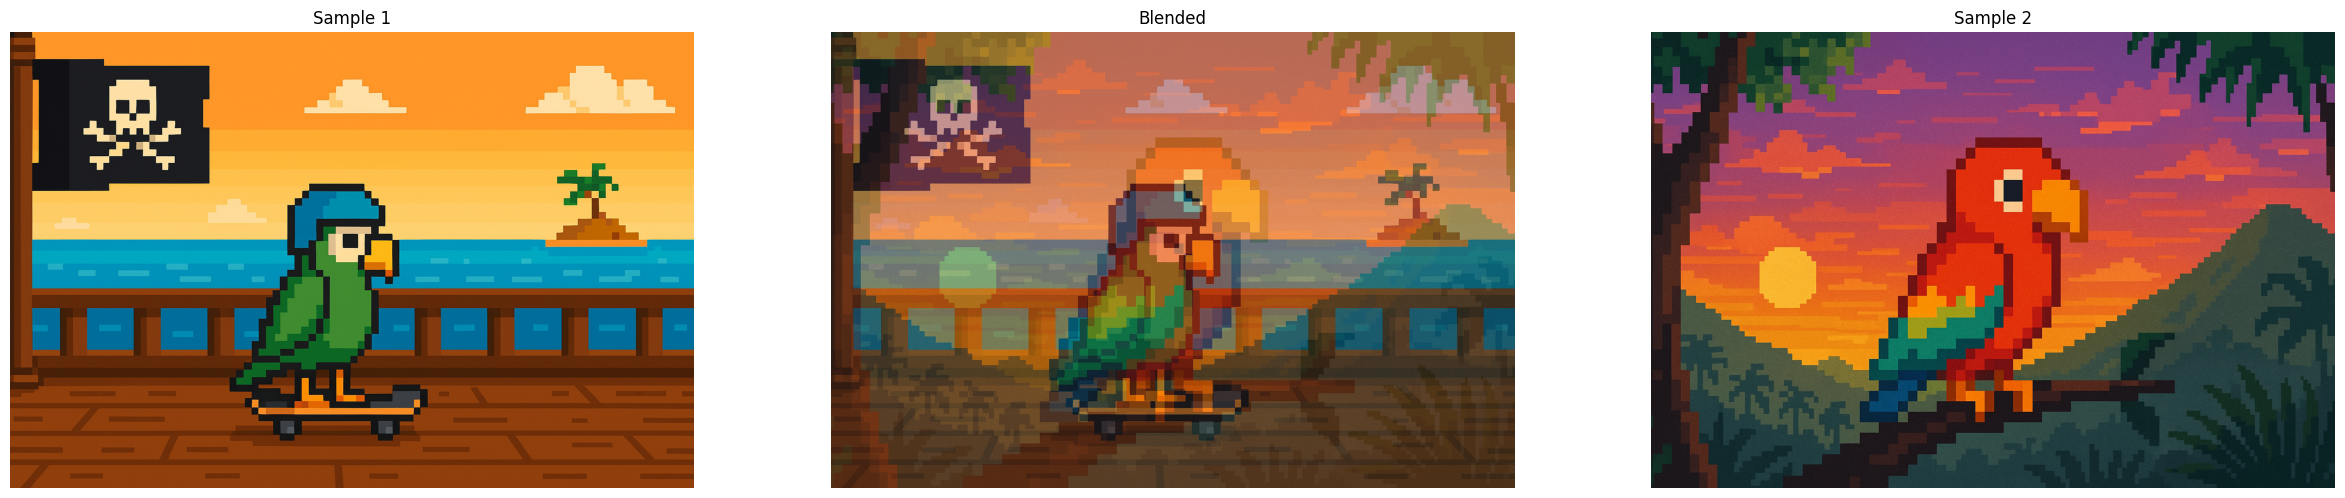

In [28]:
# Reading the sample image
bgr_image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
bgr_image2 = cv2.imdecode(image_bytes_2, cv2.IMREAD_COLOR)

# Color conversion to ensure proper display of images
image_sample_1 = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
image_sample_2 = cv2.cvtColor(bgr_image2, cv2.COLOR_BGR2RGB)

# Image Addition and Subtraction
image_brighter = cv2.add(image_sample_1, 100)
image_darker = cv2.subtract(image_sample_1, 100)
image_blend = cv2.addWeighted(image_sample_1, 0.5, image_sample_2, 0.5, 0)

# Creation of the MatPlotLib figure for comparison of images
create_mpl_figure(30,10, [image_darker, image_sample_1, image_brighter], ['Darker', 'Original', 'Brighter'])
create_mpl_figure(30,10, [image_sample_1, image_blend, image_sample_2], ['Sample 1', 'Blended', 'Sample 2'])

### Image Multiplication:

**What it does:** Image multiplication increases or decreases the intensity values of pixels within an image, increasing or decreasing contrast within the given image. It multiplies either two images together, or an image and a scalar value. Scalars > 1 will result in higher contrast, and scalars < 1 will result in lower contrast.

**Why it matters:** One use of image multiplication can assist in the training of ML models, allowing them to learn to recognize a given object in lower and higher contrast situations.

**The Code & Output**

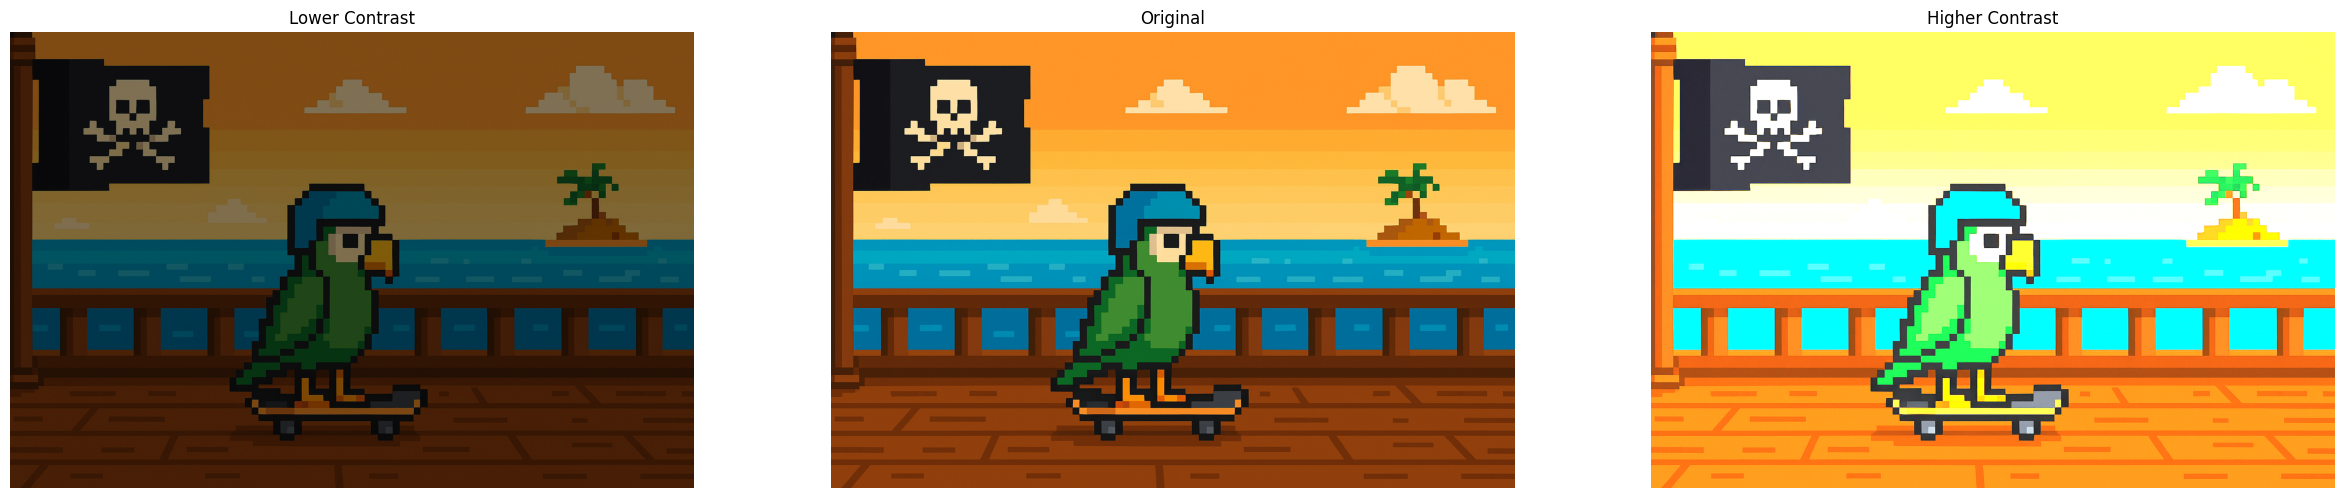

In [29]:
# Reading the sample image
image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)

# Color conversion to ensure proper display of images
image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

# Image multiplication
image_higher_contrast = cv2.multiply(image, 2.5)
image_lower_contrast = cv2.multiply(image, 0.5)

# Creation of the MatPlotLib figure for comparison of images
create_mpl_figure(30,10, [image_lower_contrast, image, image_higher_contrast], ['Lower Contrast', 'Original', 'Higher Contrast'])


### Bitwise AND:

**What it does:** Bitwise AND evaluates either two images, or an image and a scalar. The result is another image where a pixel is set to 1 if the corresponding pixels in both inputs are 1.

**Why it matters:** Bitwise AND operations are very commonly used for masking, a technique that will be covered later within this blog.

**The Code & Output**

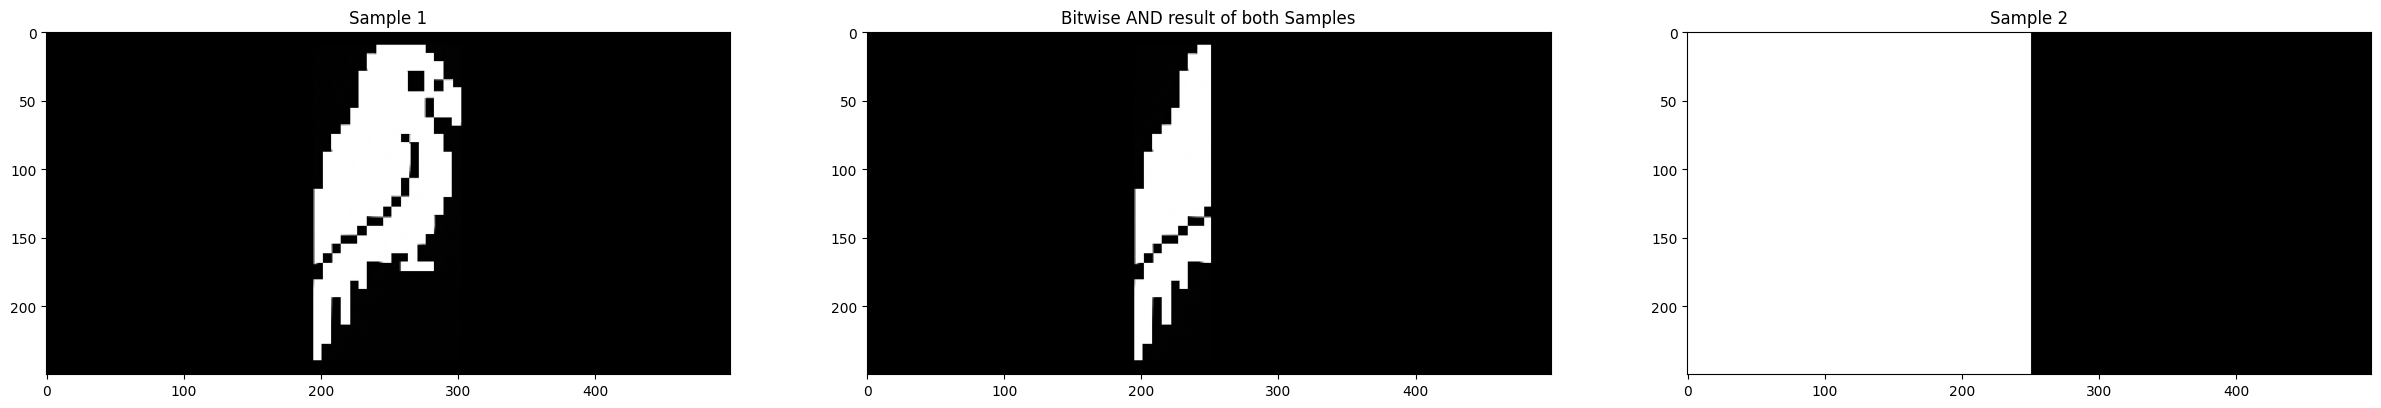

In [31]:
# Reading the sample image
image = cv2.imdecode(image_bytes_3, cv2.IMREAD_COLOR)
image_2 = cv2.imdecode(image_bytes_4, cv2.IMREAD_COLOR)

# Bitwise AND operation
bitwise_and = cv2.bitwise_and(image, image_2)

# Creation of the MatPlotLib figure for comparison of images
create_mpl_figure(30, 10, [image, bitwise_and, image_2 ], ['Sample 1', 'Bitwise AND result of both Samples', 'Sample 2'],'on')

### Bitwise OR:

**What it does:** Bitwise OR evaluates either two images, or an image and a scalar. The result is another image where a pixel is set to 1 if, between the two images, at least of of them contains a corresponding pixel set to 1.

**Why it matters:** Moving beyond simple image combination, Bitwise OR can be useful for creating composite images where information from multiple different sources is stored. Should you ever have need of combining features and elements of different images into a distinct output image, Bitwise OR will be the best method.

**The Code & Output**

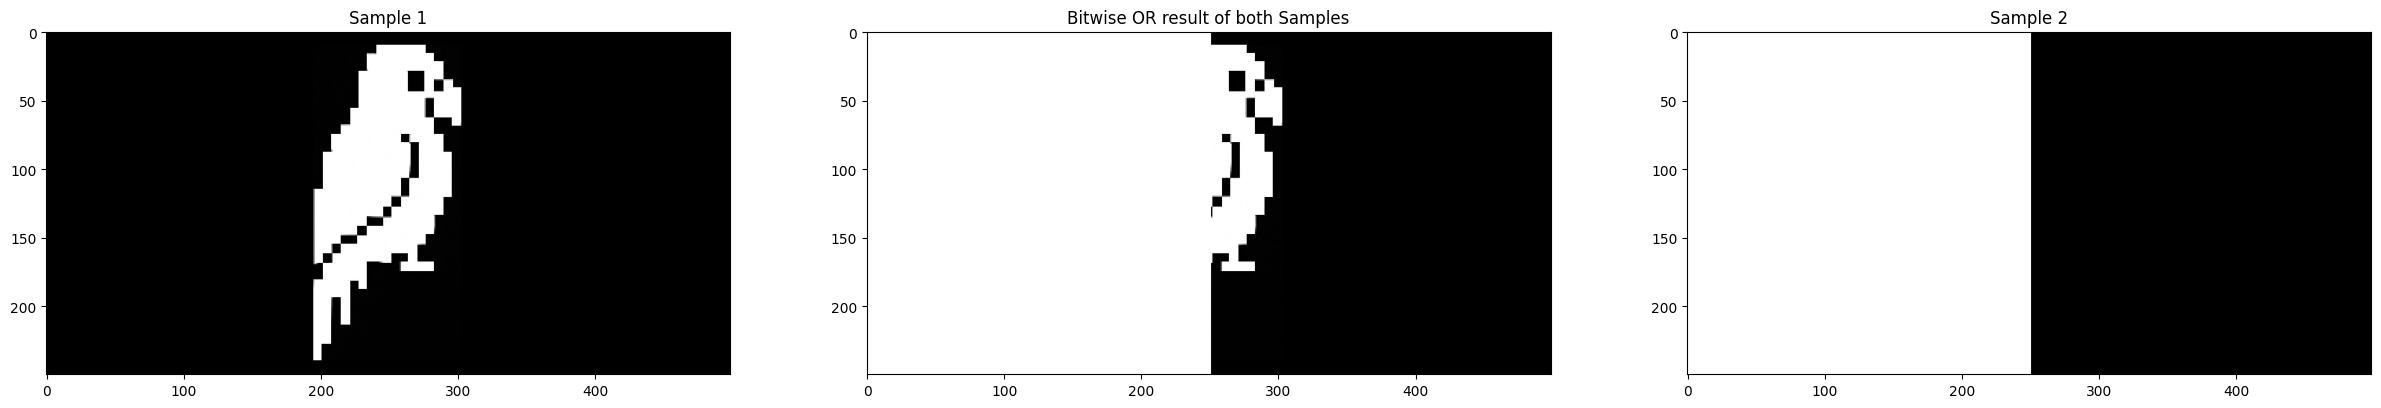

In [32]:
# Reading the sample image
image = cv2.imdecode(image_bytes_3, cv2.IMREAD_COLOR)
image_2 = cv2.imdecode(image_bytes_4, cv2.IMREAD_COLOR)

# Bitwise OR operation
bitwise_or = cv2.bitwise_or(image, image_2)

# Creation of the MatPlotLib figure for comparison of images
create_mpl_figure(30, 10, [image, bitwise_or, image_2], ['Sample 1', 'Bitwise OR result of both Samples', 'Sample 2'], 'on')

### Bitwise NOT:

**What it does:** Bitwise NOT takes a single image or scalar, and inverts the bits of each pixel value. In simple terms, it takes the binary representation of every pixel (assuming 8-bit: 00000000 - 11111111) and inverts each bit.

**Why it matters:** Bitwise NOT has a variety of uses, but some of them are as follows: inversion of images, creating negative images, or highlighting important features of a given image.

**The Code & Output**

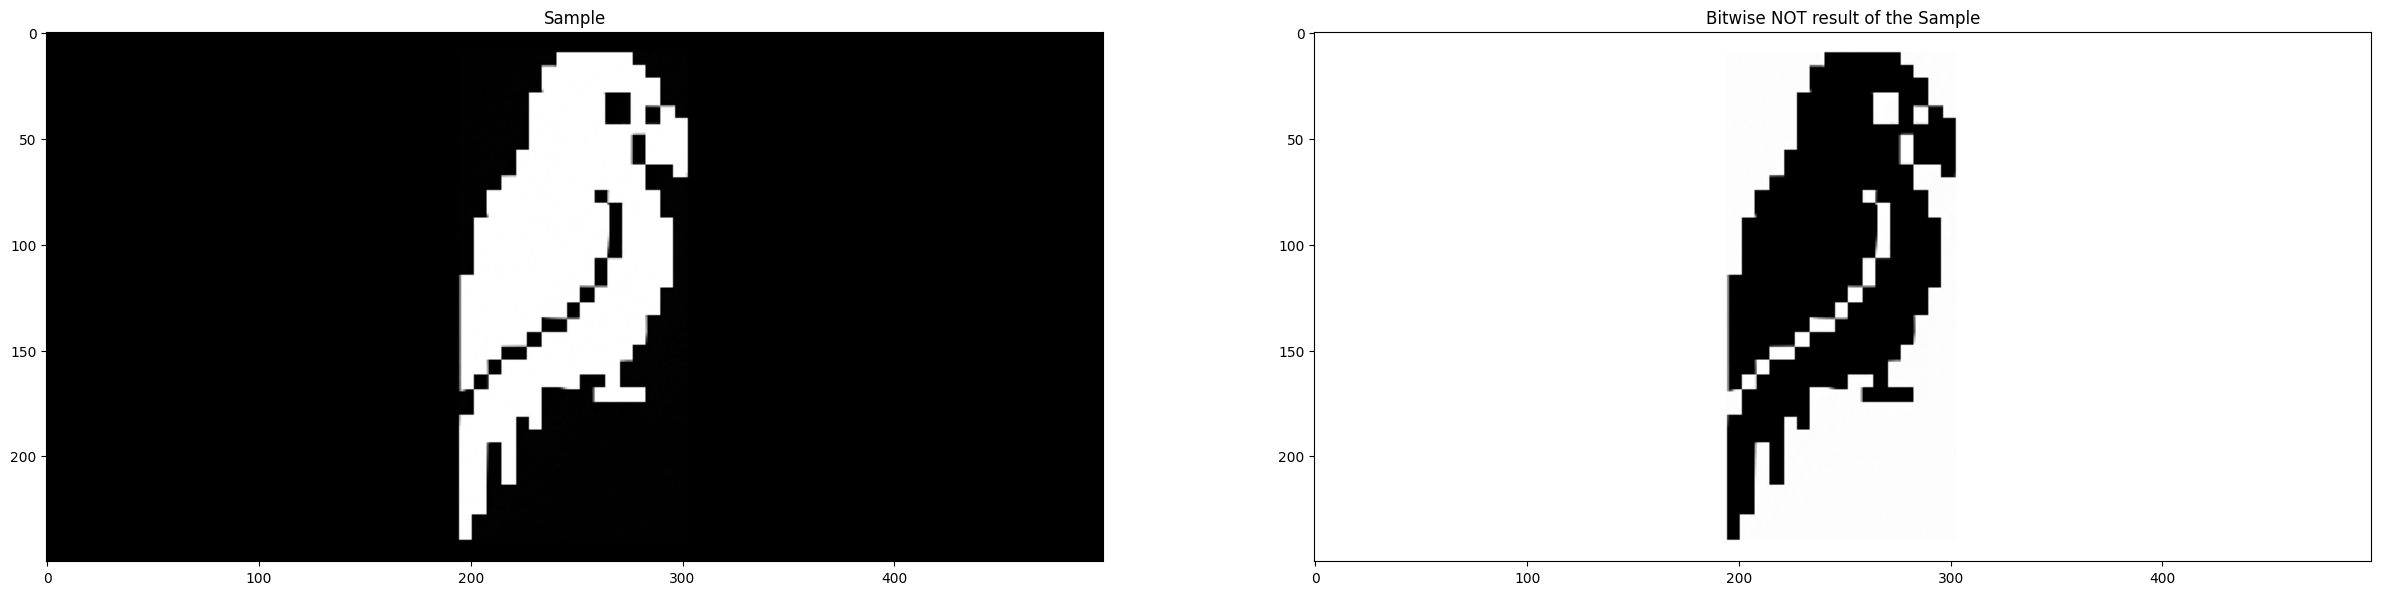

In [33]:
# Reading the sample image
image = cv2.imdecode(image_bytes_3, cv2.IMREAD_COLOR)

# Bitwise OR operation
bitwise_not = cv2.bitwise_not(image)

# Creation of the MatPlotLib figure for comparison of images
create_mpl_figure(30, 10, [image, bitwise_not], ['Sample', 'Bitwise NOT result of the Sample'], 'on')

### Bitwise XOR:

**What it does:** Bitwise XOR evaluates either two images, or an image and a scalar. The result is an image where each pixel is set to 1 if the corresponding pixels from each image differ from one another. If they do not differ from one another, they remain the same.

**Why it matters:** Bitwise XOR is very useful for noting differences between two images, because pixels that are the same in each image compared will be 0 in the output, and images that are different will be set to non-0 values. This is exceedingly useful for change-detection, a common practice for video surveillance cameras to automatically detect movement.

**The Code & Output**

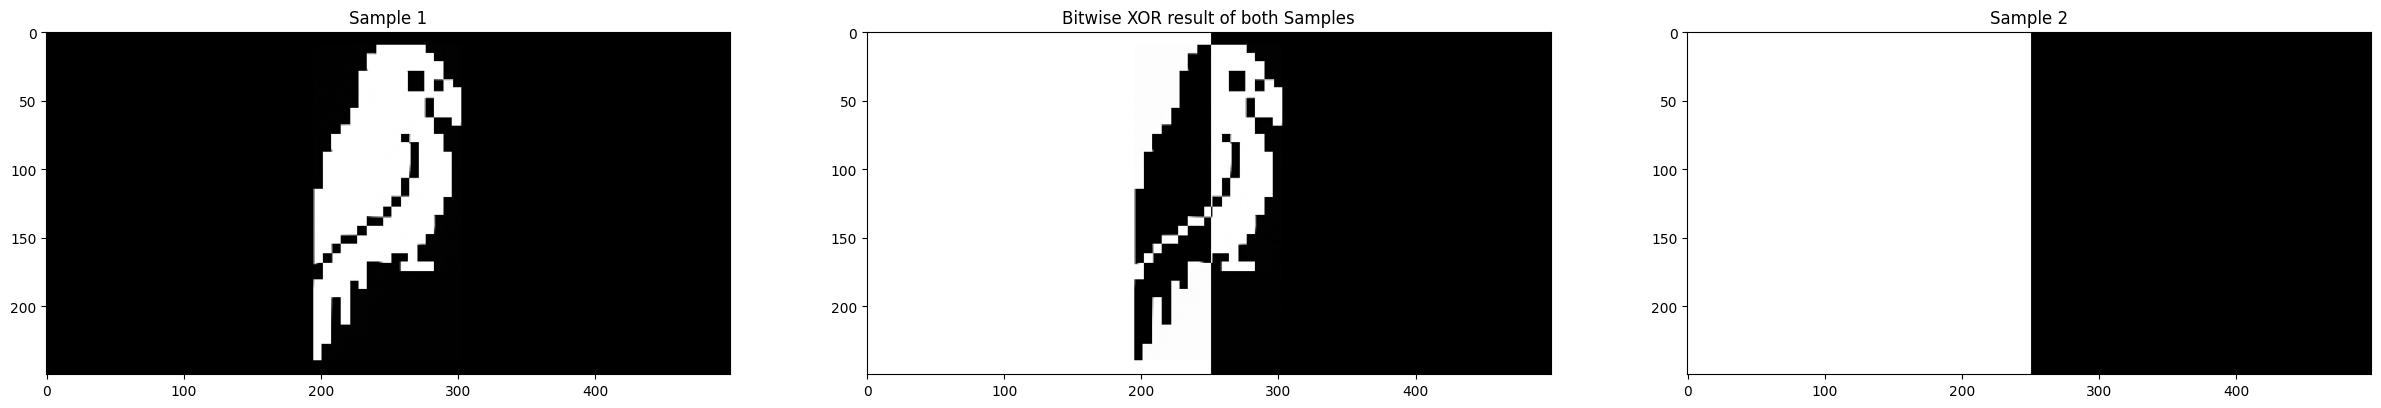

In [34]:
# Reading the sample image
image = cv2.imdecode(image_bytes_3, cv2.IMREAD_COLOR)
image_2 = cv2.imdecode(image_bytes_4, cv2.IMREAD_COLOR)

# Bitwise XOR operation
bitwise_xor = cv2.bitwise_xor(image, image_2)

# Creation of the MatPlotLib figure for comparison of images
create_mpl_figure(30, 10, [image, bitwise_xor, image_2], ['Sample 1', 'Bitwise XOR result of both Samples', 'Sample 2'], 'on')

### Masking:

**What it does:** Masking is a technique where the user will define a ROI (region of interest) in the image, and then perform operations only within that region.

**Why it matters:** The use of masks allows for selective processing of images, that is, applying filters, color adjustments or other image manipulations to certain parts of an image without changing the rest of the image. Additionally, it enables a number of other techniques, such as object isolation, image composition, or region-based analysis, among others.

**The Code & Output**

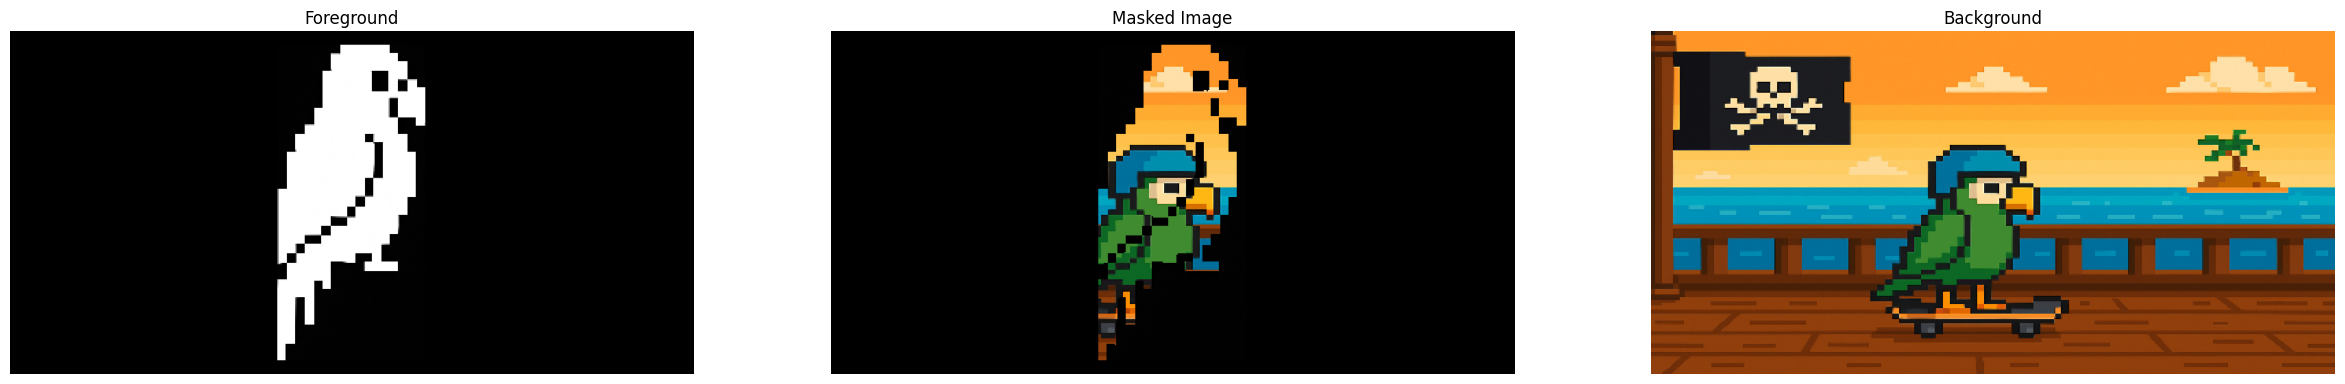

In [35]:
# Reading the sample image
image = cv2.imdecode(image_bytes_3, cv2.IMREAD_COLOR)
image_2 = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)

# Color conversion to ensure proper display of images
image_foreground = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_background = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# Resizing the background image for consistency
mask_w = image_foreground.shape[0]
mask_h = image_foreground.shape[1]

image_background_resized = cv2.resize(image_background, (mask_h, mask_w))

# Masking Operation
gray_foreground = cv2.cvtColor(image_foreground, cv2.COLOR_BGR2GRAY)

# Create mask and inverted mask of the foreground
retval, mask = cv2.threshold(gray_foreground, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Apply foreground image to background
foreground = cv2.bitwise_and(image_background_resized, image_background_resized, mask=mask)

# Apply background image to foreground
background = cv2.bitwise_and(image_foreground, image_foreground, mask=mask_inv)

# Combine the two
masked_image = cv2.bitwise_or(foreground, background)

# Creation of the MatPlotLib figure for comparison of images
create_mpl_figure(30, 10, [image_foreground, masked_image, image_background_resized], ['Foreground', 'Masked Image', 'Background'])

### Splitting & Merging Color Channels:

**What it does:** Splitting and merging color channels of images, like the title suggests, splits a multi-channel array into several single-channel arrays and merges several arrays to make a single multi-channel array.

**Why it matters:** Splitting and Merging color channels allows users to make more precise adjustments to color when it comes to individually editing color channels, whether that be concerning their vibrancy, brightness, contrast, or some other characteristic. It can also allow for the creation of color-blind filters.

**The Code & Output**

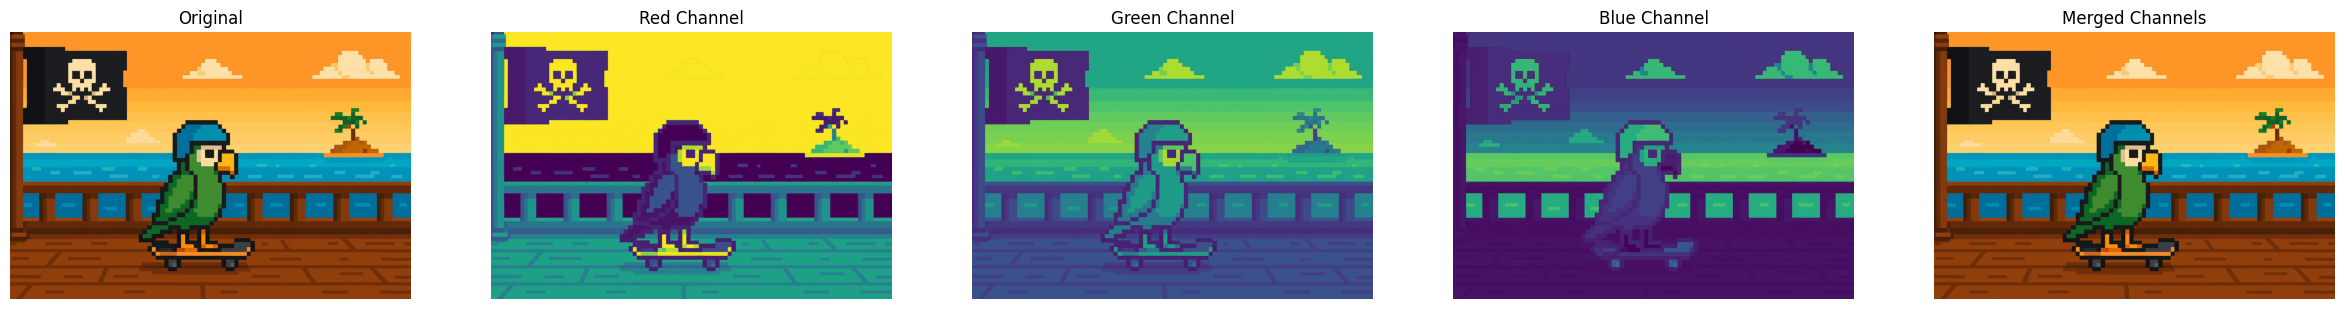

In [36]:
# Reading the sample image
bgr_image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)

# Color conversion to ensure proper display of images
image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

# Color Splitting and Merging
r,g,b = cv2.split(image)

merged_channels = cv2.merge([r,g,b])

# Creation of the MatPlotLib figure for comparison of images
create_mpl_figure(30, 10, [image, r, g, b, merged_channels], ['Original', 'Red Channel', 'Green Channel', 'Blue Channel', 'Merged Channels'])

## Conclusion

In the next blog we will be covering a variety of different color conversions, filtering techniques, and blurring techniques.

In [15]:
# @title Contact Software Sushi
load_html_from_github('https://raw.githubusercontent.com/SoftwareSushi/marketing-resources/refs/heads/main/html/cta-banner.html')